# Fraud Detection
Creating a machine learning model to accurately predict whether a transaction is fraudulent or not.
#### Requirements
1. Start with some exploration of the data – what are the fields, how are they distributed, will they require any transformations?
2. Prepare the dataset for machine learning
3. Create an supervised machine learning model
4. Measure the accuracy of your model
#### Extension
To extend the project, try using two different supervised learning algorithms and use methods to measure their accuracy. Which model would you choose? Why?
#### Models
Artificial Neural Network (ANN), Logistic Regression, and kNN.
#### Performance metrics
Accuracy, precision, recall, F1-score, ROC curve, AUC

In [1]:
# import modules
## standard modules
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

## pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## modelling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Dense, Dropout
from keras.models import Sequential

## performance metrics
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve 

In [127]:
from matplotlib.ticker import ScalarFormatter

#### About Dataset
    step: represents a unit of time where 1 step equals 1 hour
    type: type of online transaction
    amount: the amount of the transaction
    nameOrig: customer starting the transaction
    oldbalanceOrg: balance before the transaction
    newbalanceOrig: balance after the transaction
    nameDest: recipient of the transaction
    oldbalanceDest: initial balance of recipient before the transaction
    newbalanceDest: the new balance of recipient after the transaction
    isFraud: fraud transaction

In [4]:
# import data
df = pd.read_csv("PS_20174392719_1491204439457_log.csv")
df.head(6)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0


## Data Exploration

### Values

In [91]:
# basic statistics on numerical data
described = df.describe().drop(axis=0, index=["std","25%","50%","75%"])
described

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [92]:
# null values
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Transaction Type

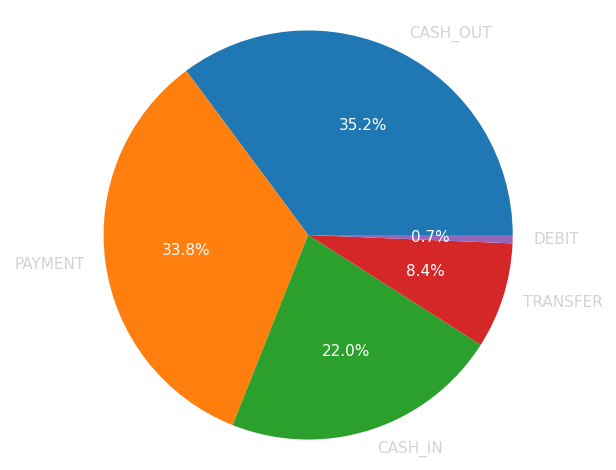

In [120]:
# Pie chart
types = df.type.value_counts()
labels = types.index

"""fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.pie(, labels=, autopct='%1.1f%%')
plt.show()"""

#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(types, labels=labels, autopct='%1.1f%%', textprops={'fontsize': 11})
for text in texts:
    text.set_color('lightgray')
for autotext in autotexts:
    autotext.set_color('white')

# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.savefig(fname="pie1.png", transparent=True)

plt.show()

### Amount

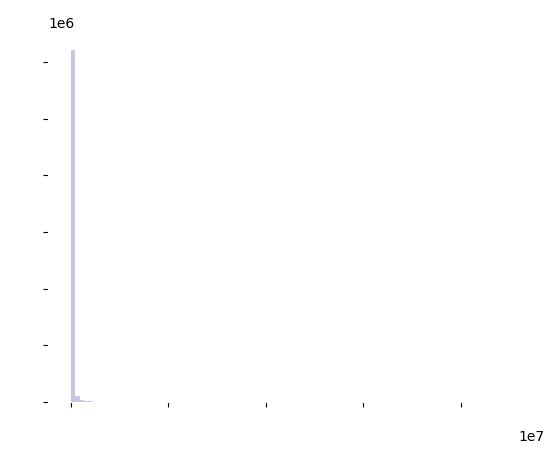

In [131]:
plt.hist(df['amount'], bins=100, color='#CBC3E3')  # Set the bar color to light purple
plt.title('Transaction Amount Histogram (100 bins)', color='white')  # Set the title color to white
plt.xlabel("Amount", color='white')  # Set the x-axis label color to white
plt.ylabel("Frequency", color='white')  # Set the y-axis label color to white
plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('white')
plt.xticks(color='white')
plt.yticks(color='white')


# Save the histogram with a transparent background
plt.savefig("amount_histogram.png", transparent=True)

# Display the histogram
plt.show()

### Step -- Time

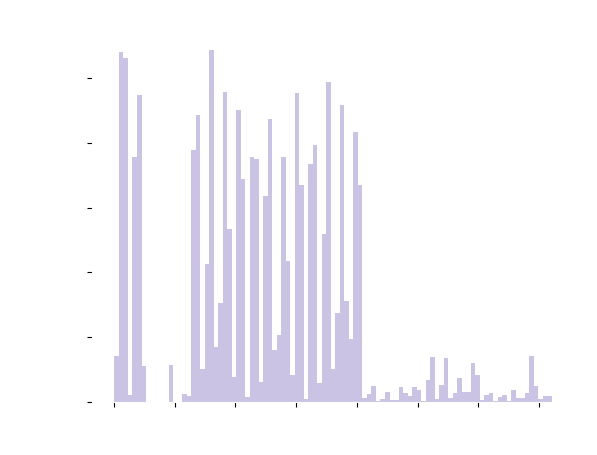

In [134]:
plt.hist(df['step'], bins=100, color='#CBC3E3')

plt.title('Transaction Time Histogram (100 bins)', color='white')

plt.xlabel("Hours passed", color='white')
plt.ylabel("Frequency", color='white')

plt.gca().spines['top'].set_color('none')
plt.gca().spines['bottom'].set_color('white')
plt.gca().spines['right'].set_color('none')
plt.gca().spines['left'].set_color('white')
plt.xticks(color='white')
plt.yticks(color='white')

# Save the histogram with a transparent background
plt.savefig("time_histogram.png", transparent=True)

plt.show()

### Fraudulent ?

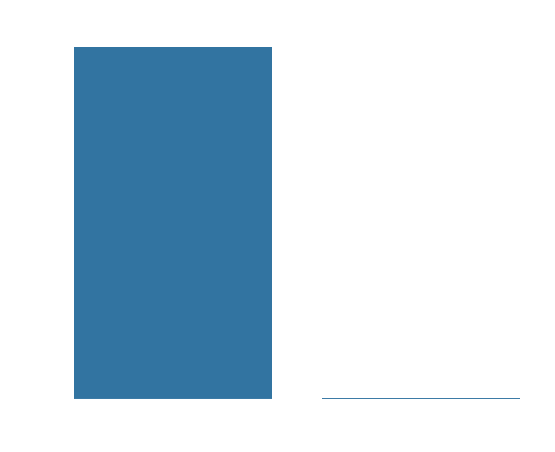

In [141]:
from matplotlib.ticker import ScalarFormatter

barplot = sns.countplot(x='isFraud', data=df)
for bar in barplot.containers:
    barplot.bar_label(bar, color='white')

# Set the scientific notation labels on the y-axis to white
ax = plt.gca()
ax.yaxis.set_major_formatter(ScalarFormatter(useMathText=True))
for tick in ax.yaxis.get_major_ticks():
    tick.label1.set_color('white')

# Set the border color (spines) to your desiwhite color
ax.spines['top'].set_color('white')  # You can change 'white' to the color of your choice
ax.spines['bottom'].set_color('white')
ax.spines['right'].set_color('white')
ax.spines['left'].set_color('white')

# Set the axis labels' color to white
ax.set_xlabel('Fraudulent (yes/no)?', color='white')
ax.set_ylabel('Frequency', color='white')
ax.tick_params(axis='both', colors='white')

# Save the countplot with a transparent background
plt.savefig("countplot.png", transparent=True)

# Display the countplot
plt.show()


## Pre-Processing

### Type mapping

In [142]:
df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [5]:
type_map = {"PAYMENT": 1, "TRANSFER": 2, "CASH_OUT": 3, "DEBIT": 4, "CASH_IN": 5}
df.type = df.type.map(type_map)
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,2,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,3,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


### Drop non-numeric data
I'm not going to use the names or the time of day. Fraud is not time limited xD

In [6]:
droppers = ["nameOrig", "nameDest", "isFlaggedFraud", "step"]
df = df.drop(axis=1, columns=droppers)
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,2,181.00,181.0,0.00,0.0,0.0,1
3,3,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


### Train/Test Split

In [7]:
X = df.iloc[:,:-1].values
y = df.isFraud.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)

### Scaling

In [8]:
# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Neural Network

In [16]:
import tensorflow as tf

### Modelling

In [17]:
# initialise
ann = Sequential()

# input layer
ann.add(Dense(units=16, kernel_initializer="uniform", activation="relu", input_dim=6))

# hidden layers w/ regularisation
ann.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))
ann.add(Dropout(0.25))
ann.add(Dense(units=8, kernel_initializer="uniform", activation="relu"))
ann.add(Dropout(0.5))

# output layer
ann.add(Dense(units=1, kernel_initializer="uniform", activation="sigmoid")) # units = 1 because this is binary classification (0 or 1)

# compile the network
ann.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# save model
ann.save("ann_model")


INFO:tensorflow:Assets written to: ann_model\assets


INFO:tensorflow:Assets written to: ann_model\assets


In [18]:
# train the ANN
history = ann.fit(X_train, y_train, batch_size=32, epochs=1, validation_split=0.25)

119300/119300 [==============================] - 426s 4ms/step - loss: 0.0142 - accuracy: 0.9987 - val_loss: 0.0065 - val_accuracy: 0.9987


In [19]:
val_accuracy = np.mean(history.history['val_accuracy'])
print("\n%s: %.2f%%" % ('validation_accuracy is', val_accuracy*100))


validation_accuracy is: 99.87%


In [20]:
# ANN prediction
ann_pred = ann.predict(X_test)

39767/39767 [==============================] - 79s 2ms/step


In [21]:
ann_pred.mean()

0.0007176189

In [22]:
threshold = y_test.mean() #1.290820e-03 #y_train.mean()


In [23]:
Yann_pred = ann_pred.copy()
Yann_pred.mean()

0.0007176189

In [24]:
Yann_pred = np.where(Yann_pred>threshold, 1, 0)
Yann_pred


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

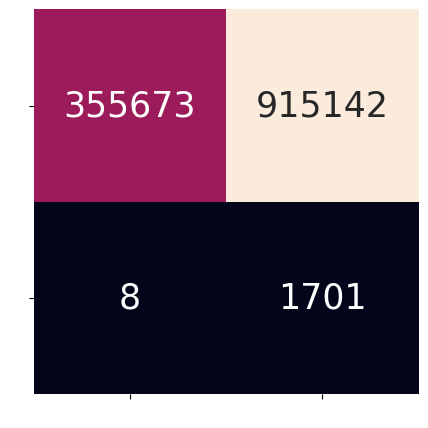

              precision    recall  f1-score   support

           0       1.00      0.28      0.44   1270815
           1       0.00      1.00      0.00      1709

    accuracy                           0.28   1272524
   macro avg       0.50      0.64      0.22   1272524
weighted avg       1.00      0.28      0.44   1272524



In [165]:
# Getting the confusion matrix
plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, Yann_pred)
ax = sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True, cbar=False,fmt="d")
ax.set_xticklabels(ax.get_xticklabels(), color='white')
ax.set_yticklabels(ax.get_yticklabels(), color='white')
plt.savefig("ANNcf.png", transparent=True)
plt.show()

print(classification_report(y_test,Yann_pred))

## Logistic Regression

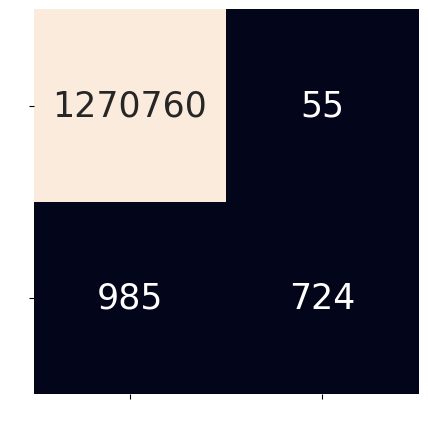

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270815
           1       0.93      0.42      0.58      1709

    accuracy                           1.00   1272524
   macro avg       0.96      0.71      0.79   1272524
weighted avg       1.00      1.00      1.00   1272524



In [26]:
LR = LogisticRegression()
LR.fit(X_train, y_train)
LR_pred = LR.predict(X_test)

plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, LR_pred)
ax = sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True, cbar=False, fmt="d")
ax.set_xticklabels(ax.get_xticklabels(), color='white')
ax.set_yticklabels(ax.get_yticklabels(), color='white')
plt.savefig("LRcf.png", transparent=True)
plt.show()

print(classification_report(y_test,LR_pred))

### kNN

In [9]:
kNN = KNeighborsClassifier()
kNN.fit(X_train, y_train)
kNN_pred = kNN.predict(X_test)

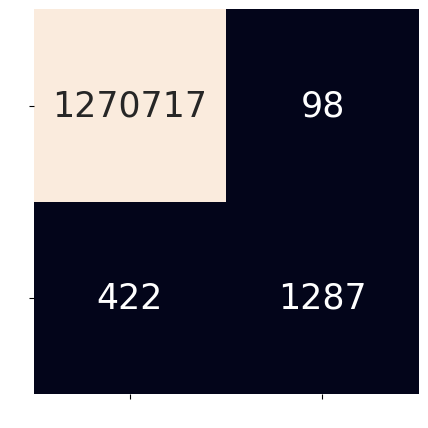

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270815
           1       0.93      0.75      0.83      1709

    accuracy                           1.00   1272524
   macro avg       0.96      0.88      0.92   1272524
weighted avg       1.00      1.00      1.00   1272524



In [11]:
plt.subplots(figsize=(6,5))
cf_matrix = confusion_matrix(y_test, kNN_pred)
ax = sns.heatmap(cf_matrix, annot = True, annot_kws = {'size':25}, square=True, cbar=False, fmt="d")
ax.set_xticklabels(ax.get_xticklabels(), color='white')
ax.set_yticklabels(ax.get_yticklabels(), color='white')

plt.savefig("kNNcf.png", transparent=True)
plt.show()

print(classification_report(y_test,kNN_pred))

## Comparison

In [96]:
acc = kNN.score(X_test,y_test)*100
acc

99.9591363306311

In [100]:
accLR = LR.score(X_test,y_test)*100
accLR

99.9182726612622

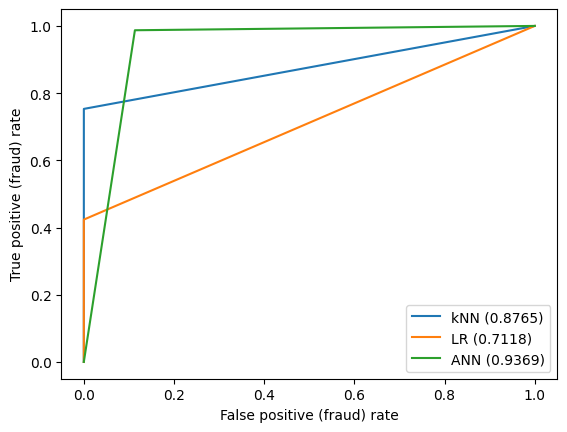

In [29]:
fpr_ann, tpr_ann = roc_curve(y_test, Yann_pred)[0:2]
fpr_LR, tpr_LR = roc_curve(y_test, LR_pred)[0:2]
fpr_kNN, tpr_kNN = roc_curve(y_test, kNN_pred)[0:2]

cba = []
predictions = [Yann_pred, LR_pred, kNN_pred]
for i in predictions:
    cba.append(roc_auc_score(y_test, i))

plt.plot(fpr_kNN, tpr_kNN, label=f"kNN ({cba[2]:.4f})")
plt.plot(fpr_LR, tpr_LR, label=f"LR ({cba[1]:.4f})")
plt.plot(fpr_ann, tpr_ann, label=f"ANN ({cba[0]:.4f})")

plt.xlabel("False positive (fraud) rate")
plt.ylabel("True positive (fraud) rate")
plt.legend()
plt.show()